## 载入包

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas  as pd
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("building_event_binary.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5039 entries, 0 to 5038
Data columns (total 6 columns):
Sunday      5039 non-null object
07/24/05    5039 non-null object
00:00:00    5039 non-null object
0           5039 non-null int64
0.1         5039 non-null int64
noevent     5039 non-null object
dtypes: int64(2), object(4)
memory usage: 236.3+ KB


In [5]:
df.index

RangeIndex(start=0, stop=5039, step=1)

In [6]:
df.columns

Index(['Sunday', '07/24/05', '00:00:00', '0', '0.1', 'noevent'], dtype='object')

需要解决的问题：行名和列名，类型/编码转换

https://blog.csdn.net/missyougoon/article/details/83780845

https://www.cnblogs.com/zhangyafei/p/10513893.html

https://segmentfault.com/a/1190000011145901

In [7]:
cols = ['week', 'date', 'time', 'enterCnt', 'leaveCnt', 'type']

In [8]:
df.columns = cols

In [9]:
df.head(2)

,week,date,time,enterCnt,leaveCnt,type
0,Sunday,07/24/05,00:30:00,1,0,noevent
1,Sunday,07/24/05,01:00:00,0,0,noevent


In [16]:
df.describe()

,enterCnt,leaveCnt
count,5039.000000,5039.000000
mean,3.738242,3.889065
std,6.010738,6.835023
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,5.000000,5.500000
max,54.000000,62.000000


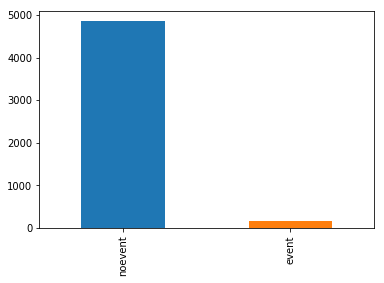

In [15]:
df.type.value_counts().plot.bar()

In [51]:
event = df[df.type == 'event']

In [55]:
event.week.value_counts()

Tuesday      45
Friday       39
Thursday     34
Wednesday    29
Monday       26
Sunday        3
Name: week, dtype: int64

In [54]:
event.time.value_counts()[0:10]

10:00:00    14
09:30:00    14
10:30:00    13
09:00:00    10
11:00:00    10
08:30:00     9
14:00:00     8
11:30:00     8
12:00:00     8
13:30:00     8
Name: time, dtype: int64

In [17]:
df.week.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

weeklbe = LabelEncoder()
weeklbe.fit(df.week.unique())


LabelEncoder()

In [24]:
def encode(x):
    global weeklbe
    newx = weeklbe.transform([x])
    return newx[0]

In [25]:
df['weekEncode'] = df.week.apply(encode)

In [26]:
df.head(2)

,week,date,time,enterCnt,leaveCnt,type,weekEncode
0,Sunday,07/24/05,00:30:00,1,0,noevent,3
1,Sunday,07/24/05,01:00:00,0,0,noevent,3


In [36]:
timelbe = LabelEncoder()
timelbe.fit(df.time.unique())

LabelEncoder()

In [37]:
def encode2(x):
    global timelbe
    newx = timelbe.transform([x])
    return newx[0]

In [38]:
df['timeEncode'] = df.time.apply(encode2)

In [39]:
df.head(2)

,week,date,time,enterCnt,leaveCnt,type,weekEncode,timeEncode
0,Sunday,07/24/05,00:30:00,1,0,noevent,3,1
1,Sunday,07/24/05,01:00:00,0,0,noevent,3,2


In [42]:
def encode3(x):
    if x == 'noevent':
        return 0
    else:
        return 1

In [43]:
df['typeEncode'] = df.type.apply(encode3)

In [44]:
df.head(2)

,week,date,time,enterCnt,leaveCnt,type,weekEncode,timeEncode,typeEncode
0,Sunday,07/24/05,00:30:00,1,0,noevent,3,1,0
1,Sunday,07/24/05,01:00:00,0,0,noevent,3,2,0


In [46]:
data = df[ ['weekEncode', 'timeEncode', 'enterCnt' , 'leaveCnt'] ]

In [47]:
data.head(2)

,weekEncode,timeEncode,enterCnt,leaveCnt
0,3,1,1,0
1,3,2,0,0


In [48]:
X = data.values

In [49]:
y = df.typeEncode